In [1]:
%config Completer.use_jedi = False

In [2]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
THRESHOLD = 74

In [4]:
start = time.time()
data = pd.read_csv('train.csv')
end = time.time()
print(end - start)


1.1744537353515625


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41691,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40790,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18333,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32806,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

[  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  57 141 139  57   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  57 224 253 251 168   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  85 253 255 253 170   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  85 251 253 251 168   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  57 255 253 255 253 170   0   0   0   

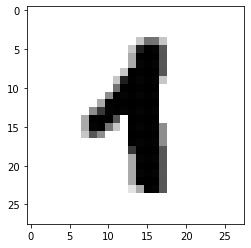

In [8]:
print(data.iloc[0].to_numpy())
pic = data.iloc[0].to_numpy()
plt.imshow(pic[1:].reshape(28,28), cmap="binary")


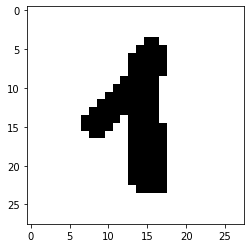

In [9]:

for i in range(1,len(pic)-1):
    if pic[i] >THRESHOLD:
        pic[i]=255
    else:
        pic[i]=0
plt.imshow(pic[1:].reshape(28,28), cmap="binary")

In [10]:
X = data.iloc [:,1:]#Frame (42000, 784)
y = data ["label"]#series (42000,)


In [11]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test, X_test, test_size=0.5, random_state=42)
# #train 29400, 0.70 of the data
# #test 6300, 0.3 of the data
# #validation 6300, 0.21 of the data 

# print(len(X_train),len(y_train))
# print(len(X_val),len(y_val))
# print(len(X_test),len(y_test))


sample = {"train": range(0,700), "val":range(700,850), "test":range(850,1000)}

X_train, X_test, X_val= X.iloc[sample["train"]], X.iloc[sample["test"]], X.iloc[sample["val"]]
y_train, y_test, y_val= y.iloc[sample["train"]], y.iloc[sample["test"]], y.iloc[sample["val"]]

print(X_train.iloc[1].to_numpy(), len(X_train.iloc[1].to_numpy()))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  77
 195 254  77   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  19 198 253 253 150   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  90 253 253 253 150   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  83 237 253 253 253  46   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  13 213 253 253 252 151   4   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 171 253 253 253 164   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  57 240 253 253 239  53   0   0   0   0   0   

In [12]:
type(X_train)
X_train.shape

(700, 784)

In [13]:
# Applying the threshold condition
X_train=X_train.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test=X_test.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val=X_val.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
#print(X_train.iloc[1].to_numpy())

<div class=" alert alert-warning"> 

- Training set size: 500 
- Test set size: 200 
- validation set size: 200 
    
</div>

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

# Or better yet: use a pipeline!
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train,y_train)
est.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)


array([3, 6, 5, 4, 0, 8, 1, 1, 4, 1, 3, 1, 5, 6, 6, 2, 3, 2, 3, 4, 0, 8,
       8, 8, 2, 4, 4, 7, 4, 0, 7, 4, 1, 4, 6, 6, 3, 9, 2, 8, 6, 0, 6, 5,
       2, 8, 5, 6, 6, 9, 8, 9, 8, 6, 0, 4, 2, 0, 7, 4, 2, 6, 7, 5, 1, 8,
       2, 9, 7, 6, 1, 7, 8, 9, 8, 4, 1, 3, 1, 3, 7, 5, 6, 7, 5, 1, 7, 0,
       5, 5, 5, 1, 8, 1, 3, 9, 0, 9, 7, 2, 4, 6, 8, 0, 0, 7, 2, 1, 6, 7,
       8, 1, 1, 6, 0, 3, 0, 0, 0, 0, 9, 3, 8, 7, 2, 0, 1, 1, 7, 3, 0, 7,
       0, 1, 2, 5, 5, 7, 3, 8, 8, 8, 9, 0, 4, 9, 8, 7, 8, 0])